In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [196]:
df_columns = ['STATION_ID', 'COMPLEX_ID', 'GTFS_STOP_ID', 'DIVISION', 'LINE', 'STOP_NAME', 'BOROUGH', 'DAYTIME_ROUTES', 'STRUCTURE', 'LATITUDE', 'LONGITUDE']
df_train_stops = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
df_train_stops.columns=df_columns

In [197]:
df_train_stops.head()

,STATION_ID,COMPLEX_ID,GTFS_STOP_ID,DIVISION,LINE,STOP_NAME,BOROUGH,DAYTIME_ROUTES,STRUCTURE,LATITUDE,LONGITUDE
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575


In [135]:
df_train_stops[df_train_stops['STOP_NAME'].str.contains('59 S')]

,STATION_ID,COMPLEX_ID,GTFS_STOP_ID,DIVISION,LINE,STOP_NAME,BOROUGH,DAYTIME_ROUTES,STRUCTURE,LATITUDE,LONGITUDE
6,7,613,R11,BMT,Astoria,Lexington Av/59 St,M,N W R,Subway,40.762660,-73.967258
7,8,8,R13,BMT,Astoria,5 Av/59 St,M,N W R,Subway,40.764811,-73.973347
34,35,35,R41,BMT,4th Av,59 St,Bk,N R,Subway,40.641362,-74.017881
159,161,614,A24,IND,8th Av - Fulton St,59 St - Columbus Circle,M,A B C D,Subway,40.768296,-73.981736
313,315,614,125,IRT,Broadway - 7Av,59 St - Columbus Circle,M,1,Subway,40.768247,-73.981929
398,400,613,629,IRT,Lexington - Shuttle,59 St,M,4 5 6,Subway,40.762526,-73.967967


In [5]:
len(df_train_stops['Stop Name'].unique())

376

### Making a df from turnstile data

In [6]:
dates = ['170624', '170617', '170610', '170603', '170527', '170520', '170513', '170506', '160625', '160618', '160611', '160604', '160528', '160521', '160514', '160507']

chronological_dates = list(reversed(dates))

In [7]:
turnstile_df = pd.DataFrame()

for date in chronological_dates:
    base = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
    url = base + date + '.txt'
    print(url)
    df = pd.read_csv(url)
    turnstile_df = pd.concat([turnstile_df, df], ignore_index=True)

http://web.mta.info/developers/data/nyct/turnstile/turnstile_160507.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160514.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160521.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160604.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160611.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160618.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160625.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170520.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170527.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170603.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170

### Pickle the turnstile_df

In [13]:
path = '/Users/murdock/Documents/Metis/MTABenson_metis/chris_pklfiles/'
with open(path + 'turnstile_df.pkl', 'wb') as pickle_file:
    pickle.dump(turnstile_df, pickle_file)

In [14]:
turnstile_df.head(6)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802,1910254


In [15]:
turnstile_df.groupby(['STATION', 'LINENAME']).sum()

ENTRIES  \
STATION         LINENAME                      
1 AV            L             1039881752893   
103 ST          1               40151705868   
                6               42730188288   
                BC              17617838072   
103 ST-CORONA   7               45635828004   
104 ST          A             1181769740719   
                JZ            1660716774996   
110 ST          6               19714779984   
111 ST          7               28933889889   
                A               50313701834   
                J               10672177898   
116 ST          23              21765949456   
                6               26528597021   
                BC            1112033984543   
116 ST-COLUMBIA 1              825251817147   
121 ST          JZ               7409193703   
125 ST          1              446629712285   
                23            2500774688653   
                456           1385322439413   
                ACBD           328183297780   
135 ST          23              26879110274   
                BC             136631843744   
137 ST CITY COL 1              303608455392   
138/GRAND CONC  45             670027661912   
14 ST           123FLM        1003080595282   
                ACEL           896152441126   
                FLM123          40437768133   
14 ST-UNION SQ  456LNQR        113725579550   
                456LNQRW       103132219821   
                LNQR456        398187762573   
...                                     ...   
TIMES SQ-42 ST  ACENQRS1237      4282043793   
                ACENQRS1237W     5632242797   
TOMPKINSVILLE   1                6250704256   
TREMONT AV      BD              92501806264   
TWENTY THIRD ST 1                2404854901   
UNION ST        R               14704633799   
UTICA AV        AC              97499738388   
V.CORTLANDT PK  1               13093087849   
VAN SICLEN AV   3               10429457478   
                JZ               8757580364   
VAN SICLEN AVE  C                8521619698   
VERNON-JACKSON  7               24105524444   
W 4 ST-WASH SQ  ABCDEFM        427617225461   
W 8 ST-AQUARIUM FQ               7709693762   
WAKEFIELD/241   2               11799989179   
WALL ST         23              77551907065   
                45             361938498928   
WEST FARMS SQ   25             298197719170   
WESTCHESTER SQ  6               16807322092   
WHITEHALL S-FRY R1              92350394557   
                R1W             91523537404   
WHITLOCK AV     6              150435952130   
WILSON AV       L                7624547180   
WINTHROP ST     25              18994792660   
WOODHAVEN BLVD  JZ              80484958011   
                MR              35615461635   
WOODLAWN        4               19670115801   
WORLD TRADE CTR ACE23           24979492169   
YORK ST         F               23009479313   
ZEREGA AV       6               36291222532   

                              EXITS                                                                 
STATION         LINENAME                                                                            
1 AV            L                                                 1405146047610                     
103 ST          1                                                   21213530499                     
                6                                                  376786314195                     
                BC                                                  15637748160                     
103 ST-CORONA   7                                                   43027327241                     
104 ST          A                                                 1184567696247                     
                JZ                                                1006689815034                     
110 ST          6                                                   19875112838                     
111 ST          7                                               

In [18]:
len(turnstile_df['STATION'].unique())

380

In [11]:
df_train_stops[df_train_stops['Stop Name'].str.contains('Norwood')]

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
87,88,88,J21,BMT,Jamaica,Norwood Av,Bk,J Z,Elevated,40.681410,-73.880039
208,210,210,D01,IND,Concourse,Norwood - 205 St,Bx,D,Subway,40.874811,-73.878855


### Get and Compute the total number of people in and out of each station, each day.

In [15]:
def ppl_per_day_turnst(dt, dataframe):

'''function to subtract the starting number (at 00:00:00 hrs) from the end-of-day (at 20:00:00 hrs) number 
for each turnstile
----------
dt = list of dates to get numbers for
dataframe = dataframe from MTA turnstile data


'''
    date = dt[0]
    
    time00 = (turnstile_df.loc[(turnstile_df.DATE == '09/09/2017') & (turnstile_df.TIME == '00:00:00'), :]) #get rows for start of day
    time20 = (turnstile_df.loc[(turnstile_df.DATE == '09/09/2017') & (turnstile_df.TIME == '20:00:00'), :])  # get rows for end of day
    print(len(time00))
    print(len(time20))
    #print(time20.SCP.iloc[2])
    pplDelta = pd.Series(range(len(time20)))  #create data frame
    for row in range(len(time20)): 
        if time20.SCP.iloc[row] == time00.SCP.iloc[row]:  # if the SCP col is the same = same turnstyle
            pplDelta[row] = int(time20.ENTRIES.iloc[row]) - int(time00.ENTRIES.iloc[row])  #subtract numb from start of day from end of day for each turnstyle
        else:
            continue  # skip if if there's not a pair of numbers for a turn style
    print(len(pplDelta)) 

SyntaxError: invalid syntax (<ipython-input-15-1719be995850>, line 1)

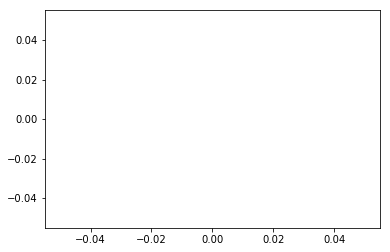

In [14]:
plt.plot(range(len(time00)),pplDelta)

### Extract columns of interest and determine which stations have the highest traffic

In [19]:
%%capture
turnstile_df.rename(columns=lambda x: x.strip(), inplace=True)

In [20]:
turnstile_df['TOTAL'] = turnstile_df['EXITS'] + turnstile_df['ENTRIES']

In [21]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,7549924
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,7549984
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,7550038
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,7550292
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,7550651


In [110]:
turnstile_df[(turnstile_df['LINENAME'] == 'FQ') & (turnstile_df['STATION'] == 'W 8 ST-AQUARIUM')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
28517,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,04/30/2016,00:00:00,REGULAR,4185130,8401619,12586749
28518,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,04/30/2016,04:00:00,REGULAR,4185132,8401633,12586765
28519,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,04/30/2016,08:00:00,REGULAR,4185134,8401651,12586785
28520,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,04/30/2016,12:00:00,REGULAR,4185143,8401752,12586895
28521,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,04/30/2016,16:00:00,REGULAR,4185169,8401987,12587156
28522,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,04/30/2016,20:00:00,REGULAR,4185225,8402114,12587339
28523,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,05/01/2016,00:00:00,REGULAR,4185231,8402152,12587383
28524,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,05/01/2016,04:00:00,REGULAR,4185231,8402164,12587395
28525,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,05/01/2016,08:00:00,REGULAR,4185232,8402180,12587412
28526,G011,R312,00-00-00,W 8 ST-AQUARIUM,FQ,BMT,05/01/2016,12:00:00,REGULAR,4185240,8402237,12587477


In [24]:
turnstile_extract_data_df = turnstile_df[['DATE', 'STATION', 'SCP', 'TOTAL', 'LINENAME']]

In [22]:
def find_busiest_stations(number, turnstile_df):
    """
    Takes a dataframe and a number n of desired stations and outputs the n busiest stations
    ---
    INPUTS: number, the number of top busiest stations desired and turnstile_df which contains all entrances and exits by day
    OUTPUT: a data frame
    """
    turnstile_extract_data_df = turnstile_df[['DATE', 'STATION', 'SCP', 'TOTAL']]
    return turnstile_extract_data_df.groupby('STATION').sum().sort_values('TOTAL', ascending=False).iloc[:number]

find_busiest_stations(5, turnstile_df)
    

,TOTAL
STATION,
42 ST-PORT AUTH,9689026885689
23 ST,8875653942933
CANAL ST,7509124616947
125 ST,7322126259177
57 ST-7 AV,7108099824153


In [65]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,7549924
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,7549984
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,7550038
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,7550292
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,7550651


In [25]:
turnstile_extract_data_df.head()

,DATE,STATION,SCP,TOTAL,LINENAME
0,04/30/2016,59 ST,02-00-00,7549924,NQR456
1,04/30/2016,59 ST,02-00-00,7549984,NQR456
2,04/30/2016,59 ST,02-00-00,7550038,NQR456
3,04/30/2016,59 ST,02-00-00,7550292,NQR456
4,04/30/2016,59 ST,02-00-00,7550651,NQR456


In [26]:
turnstile_extract_data_df.groupby(['DATE', 'STATION'],as_index=False).sum()

,DATE,STATION,TOTAL
0,04/29/2017,1 AV,17325610851
1,04/29/2017,103 ST,4399550885
2,04/29/2017,103 ST-CORONA,809528126
3,04/29/2017,104 ST,50201428879
4,04/29/2017,110 ST,365111023
5,04/29/2017,111 ST,1068699369
6,04/29/2017,116 ST,22710299415
7,04/29/2017,116 ST-COLUMBIA,8847909129
8,04/29/2017,121 ST,81628112
9,04/29/2017,125 ST,64640054878


In [27]:
turnstile_extract_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127257 entries, 0 to 3127256
Data columns (total 5 columns):
DATE        object
STATION     object
SCP         object
TOTAL       int64
LINENAME    object
dtypes: int64(1), object(4)
memory usage: 119.3+ MB


In [28]:
turnstile_extract_data_df['DATE'] = pd.to_datetime(turnstile_extract_data_df['DATE'], format='%m/%d/%Y')

/Users/murdock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
turnstile_extract_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127257 entries, 0 to 3127256
Data columns (total 5 columns):
DATE        datetime64[ns]
STATION     object
SCP         object
TOTAL       int64
LINENAME    object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 119.3+ MB


In [208]:
turnstile_extract_data_df.head()

,DATE,STATION,SCP,TOTAL,LINENAME
0,2016-04-30,59 ST,02-00-00,7549924,NQR456
1,2016-04-30,59 ST,02-00-00,7549984,NQR456
2,2016-04-30,59 ST,02-00-00,7550038,NQR456
3,2016-04-30,59 ST,02-00-00,7550292,NQR456
4,2016-04-30,59 ST,02-00-00,7550651,NQR456


In [209]:
turnstile_extract_data_df['weekday'] = turnstile_extract_data_df['DATE'].dt.dayofweek

/Users/murdock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [211]:
 turnstile_extract_data_df.head()

,DATE,STATION,SCP,TOTAL,LINENAME,weekday
0,2016-04-30,59 ST,02-00-00,7549924,NQR456,5
1,2016-04-30,59 ST,02-00-00,7549984,NQR456,5
2,2016-04-30,59 ST,02-00-00,7550038,NQR456,5
3,2016-04-30,59 ST,02-00-00,7550292,NQR456,5
4,2016-04-30,59 ST,02-00-00,7550651,NQR456,5


In [212]:
turnstile_extract_data_df.groupby(['weekday', 'STATION']).sum().reset_index()

,weekday,STATION,TOTAL
0,0,1 AV,356874745184
1,0,103 ST,74261453505
2,0,103 ST-CORONA,12484304119
3,0,104 ST,739000710642
4,0,110 ST,5623885804
5,0,111 ST,19572118370
6,0,116 ST,367424324305
7,0,116 ST-COLUMBIA,144208743164
8,0,121 ST,1350677834
9,0,125 ST,1047719371449


In [149]:
turnstile_extract_data_df.groupby(['weekday', 'STATION']).sum().head()

TOTAL
weekday STATION                    
0       1 AV           356874745184
        103 ST          74261453505
        103 ST-CORONA   12484304119
        104 ST         739000710642
        110 ST           5623885804

In [148]:
dff = turnstile_extract_data_df.sort_values(['weekday', 'TOTAL'], ascending=[True,False])
dff.head()

,DATE,STATION,SCP,TOTAL,weekday
3021015,2017-06-19,47-50 STS ROCK,01-03-02,3959266077,0
3021014,2017-06-19,47-50 STS ROCK,01-03-02,3959263893,0
3021013,2017-06-19,47-50 STS ROCK,01-03-02,3959262737,0
3021012,2017-06-19,47-50 STS ROCK,01-03-02,3959260774,0
3021011,2017-06-19,47-50 STS ROCK,01-03-02,3959260280,0


In [124]:
dff[dff['weekday']==0].iloc[:5]

,DATE,STATION,SCP,TOTAL,weekday
3021015,2017-06-19,47-50 STS ROCK,01-03-02,3959266077,0
3021014,2017-06-19,47-50 STS ROCK,01-03-02,3959263893,0
3021013,2017-06-19,47-50 STS ROCK,01-03-02,3959262737,0
3021012,2017-06-19,47-50 STS ROCK,01-03-02,3959260774,0
3021011,2017-06-19,47-50 STS ROCK,01-03-02,3959260280,0


In [131]:
dff2 = dff.groupby(['weekday', 'STATION']).sum().reset_index()
dff2.head()

,weekday,STATION,TOTAL
0,0,1 AV,356874745184
1,0,103 ST,74261453505
2,0,103 ST-CORONA,12484304119
3,0,104 ST,739000710642
4,0,110 ST,5623885804


In [133]:
dff2[dff2['weekday']==1].iloc[:5]

,weekday,STATION,TOTAL
380,1,1 AV,365832768659
381,1,103 ST,71248431928
382,1,103 ST-CORONA,12841212433
383,1,104 ST,733313910030
384,1,110 ST,5833756337


In [162]:
from datetime import datetime
date = '09/20/2017'
desired_date = datetime.strptime(date, '%m/%d/%Y').weekday()
print(desired_date)

2


In [165]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,7549924
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,7549984
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,7550038
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,7550292
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,7550651


In [31]:
from datetime import datetime
date = '09/21/2017'
def select_stations(date, number_of_stations, turnstile_df):
    desired_date = datetime.strptime(date, '%m/%d/%Y').weekday()
    turnstile_extract_data_df = turnstile_df[['DATE', 'STATION', 'SCP', 'TOTAL', 'LINENAME']]
    turnstile_extract_data_df['DATE'] = pd.to_datetime(turnstile_extract_data_df['DATE'], format='%m/%d/%Y')
    turnstile_extract_data_df['WEEKDAY'] = turnstile_extract_data_df['DATE'].dt.dayofweek
    sorted_df = turnstile_extract_data_df.sort_values(['WEEKDAY', 'TOTAL'], ascending=[True,False])
    grouped_df = sorted_df.groupby(['WEEKDAY', 'STATION', 'LINENAME']).sum().reset_index().sort_values(['TOTAL'], ascending=False)
    return grouped_df[grouped_df['WEEKDAY']==desired_date].iloc[:number_of_stations]
    
select_stations(date, 5, turnstile_df)

/Users/murdock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/murdock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,WEEKDAY,STATION,LINENAME,TOTAL
1639,3,42 ST-PORT AUTH,ACENQRS1237,693332548176
1682,3,72 ST,123,681496348543
1640,3,42 ST-PORT AUTH,ACENQRS1237W,665423079584
1660,3,57 ST-7 AV,NQR,656701457400
1603,3,23 ST,FM,617390293183


### Opening pklfile for summing turnstile data

In [175]:
path = '/Users/murdock/Documents/Metis/MTABenson_metis/pklfiles/'
with open(path + 'shinyhappypeople.pkl', 'rb') as pickle_file:
    test = pickle.load(pickle_file)

In [176]:
test.head()

,DATE,STATION,LINENAME,ID,HOUR,ENTRIES,EXITS,WEEKDAY
0,09/10/2017,59 ST,NQR456W,02-00-00,04:00:00,16,4,6
1,09/10/2017,59 ST,NQR456W,02-00-00,08:00:00,12,16,6
2,09/10/2017,59 ST,NQR456W,02-00-00,12:00:00,98,68,6
3,09/10/2017,59 ST,NQR456W,02-00-00,16:00:00,186,48,6
4,09/10/2017,59 ST,NQR456W,02-00-00,20:00:00,198,43,6


In [177]:
test.tail()

,DATE,STATION,LINENAME,ID,HOUR,ENTRIES,EXITS,WEEKDAY
23494,09/10/2017,EASTCHSTER/DYRE,5,00-00-04,05:00:00,0,0,6
23495,09/10/2017,EASTCHSTER/DYRE,5,00-00-04,09:00:00,0,0,6
23496,09/10/2017,EASTCHSTER/DYRE,5,00-00-04,13:00:00,0,0,6
23497,09/10/2017,EASTCHSTER/DYRE,5,00-00-04,17:00:00,0,0,6
23498,09/10/2017,EASTCHSTER/DYRE,5,00-00-04,21:00:00,8,20,6


In [178]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23499 entries, 0 to 23498
Data columns (total 8 columns):
DATE        23499 non-null object
STATION     23499 non-null object
LINENAME    23499 non-null object
ID          23499 non-null object
HOUR        23499 non-null object
ENTRIES     23089 non-null object
EXITS       22657 non-null object
WEEKDAY     23499 non-null object
dtypes: object(8)
memory usage: 1.6+ MB


### Going through the steps to determine busiest stations given the df with sums for the hour

In [179]:
test['TOTAL'] = test['EXITS'] + test['ENTRIES']

In [180]:
test.head()

,DATE,STATION,LINENAME,ID,HOUR,ENTRIES,EXITS,WEEKDAY,TOTAL
0,09/10/2017,59 ST,NQR456W,02-00-00,04:00:00,16,4,6,20
1,09/10/2017,59 ST,NQR456W,02-00-00,08:00:00,12,16,6,28
2,09/10/2017,59 ST,NQR456W,02-00-00,12:00:00,98,68,6,166
3,09/10/2017,59 ST,NQR456W,02-00-00,16:00:00,186,48,6,234
4,09/10/2017,59 ST,NQR456W,02-00-00,20:00:00,198,43,6,241


In [186]:
test_extract_data_df = test[['DATE', 'STATION', 'ID', 'TOTAL', 'LINENAME', 'WEEKDAY', 'HOUR']]
test_extract_data_df.head()

,DATE,STATION,ID,TOTAL,LINENAME,WEEKDAY,HOUR
0,09/10/2017,59 ST,02-00-00,20,NQR456W,6,04:00:00
1,09/10/2017,59 ST,02-00-00,28,NQR456W,6,08:00:00
2,09/10/2017,59 ST,02-00-00,166,NQR456W,6,12:00:00
3,09/10/2017,59 ST,02-00-00,234,NQR456W,6,16:00:00
4,09/10/2017,59 ST,02-00-00,241,NQR456W,6,20:00:00


In [182]:
test_extract_data_df.tail()

,DATE,STATION,ID,TOTAL,LINENAME,WEEKDAY
23494,09/10/2017,EASTCHSTER/DYRE,00-00-04,0,5,6
23495,09/10/2017,EASTCHSTER/DYRE,00-00-04,0,5,6
23496,09/10/2017,EASTCHSTER/DYRE,00-00-04,0,5,6
23497,09/10/2017,EASTCHSTER/DYRE,00-00-04,0,5,6
23498,09/10/2017,EASTCHSTER/DYRE,00-00-04,28,5,6


In [187]:
test_extract_data_df['DATE'] = pd.to_datetime(test_extract_data_df['DATE'], format='%m/%d/%Y')

/Users/murdock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [148]:
test_extract_data_df[test_extract_data_df['WEEKDAY']==0]

,DATE,STATION,ID,TOTAL,LINENAME,WEEKDAY


In [188]:
sorted_df = test_extract_data_df.sort_values(['WEEKDAY', 'TOTAL'], ascending=[True,False])
sorted_df.head()

,DATE,STATION,ID,TOTAL,LINENAME,WEEKDAY,HOUR
12701,2017-09-10,23 ST,00-00-02,3749128476,FM,6,00:00:00
1396,2017-09-10,CANAL ST,00-00-00,3484294953,JNQRZ6W,6,01:00:00
15964,2017-09-10,CHRISTOPHER ST,00-00-00,2587987138,1,6,00:00:00
1494,2017-09-10,CANAL ST,00-06-00,2535983072,JNQRZ6W,6,01:00:00
460,2017-09-10,42 ST-PORT AUTH,00-00-05,2458030579,ACENQRS1237W,6,00:00:00


In [192]:
sorted_df[sorted_df['STATION']=='CANAL ST'].groupby(['DATE','LINENAME','STATION','ID']).sum()

TOTAL  WEEKDAY  \
DATE       LINENAME STATION  ID                                
2017-09-10 1        CANAL ST 00-00-00  5.000000e+02       30   
                             00-00-01  7.360000e+02       30   
                             00-00-02  1.098000e+03       30   
                             01-00-00  1.387000e+03       30   
                             01-00-01  4.990000e+02       30   
                             01-00-02  5.150000e+02       30   
           ACE      CANAL ST 00-00-00  2.563000e+03       30   
                             00-00-01  8.970000e+02       30   
                             00-00-02  4.180000e+02       30   
                             00-03-00  4.330000e+02       30   
                             00-03-01  9.370000e+02       30   
                             00-03-02  2.136000e+03       30   
                             00-04-00  1.233000e+03       30   
                             00-04-01  6.470000e+02       30   
                             00-04-02  8.420000e+02       30   
                             00-06-00  1.453000e+03       30   
                             00-06-01  7.240000e+02       30   
                             00-06-02  1.499000e+03       30   
                             01-00-00  1.449000e+03       30   
                             01-00-01  8.120000e+02       30   
                             01-00-02  8.060000e+02       30   
                             01-03-00  1.375000e+03       30   
                             01-05-00  6.310000e+02       30   
                             01-06-00  1.200000e+01       30   
                             01-06-01  1.370000e+02       30   
           JNQRZ6W  CANAL ST 00-00-00  4.305028e+09      114   
                             00-00-01  7.873077e+08      114   
                             00-00-02  2.374175e+09      114   
                             00-00-03  1.363000e+03       30   
                             00-03-00  7.452246e+06       78   
                             00-03-01  1.812690e+07       78   
                             00-03-02  1.064000e+03       42   
                             00-03-03  1.323000e+03       42   
                             00-03-04  2.125000e+03       42   
                             00-05-00           NaN       30   
                             00-05-01           NaN       30   
                             00-05-02           NaN       30   
                             00-05-03           NaN       30   
                             00-06-00  2.535989e+09       78   
                             00-06-01  8.853255e+06       78   
                             00-06-02  8.088108e+06       78   
                             00-06-03  2.862000e+03       30   
                             00-06-04  1.804000e+03       30   
                             00-06-05  8.630000e+02       30   
                             00-06-06  3.441000e+03       30   
                             00-06-07  2.038000e+03       30   
                             00-06-08  1.554000e+03       30   

                                                                                    HOUR  
DATE       LINENAME STATION  ID                                                           
2017-09-10 1        CANAL ST 00-00-00           17:00:0021:00:0013:00:0009:00:0005:00:00  
                             00-00-01           17:00:0021:00:0013:00:0005:00:0009:00:00  
                             00-00-02           17:00:0021:00:0013:00:0005:00:0009:00:00  
                             01-00-00           17:00:0021:00:0013:00:0009:00:0005:00:00  
                             01-00-01           17:00:0013:00:0021:00:0009:00:0005:00:00  
                             01-00-02           17:00:0013:00:0021:00:0009:00:0005:00:00  
           ACE      CANAL ST 00-00-00           16:00:0020:00:0012:00:0004:00:0008:00:00  
                             00-00-01           20:00:0016:00:0012:00:0004:00:0008:00:00  

In [195]:
sorted_df[sorted_df['STATION']=='CANAL ST']

,DATE,STATION,ID,TOTAL,LINENAME,WEEKDAY,HOUR
1396,2017-09-10,CANAL ST,00-00-00,3484294953,JNQRZ6W,6,01:00:00
1494,2017-09-10,CANAL ST,00-06-00,2535983072,JNQRZ6W,6,01:00:00
1434,2017-09-10,CANAL ST,00-00-02,2359028262,JNQRZ6W,6,01:00:00
1390,2017-09-10,CANAL ST,00-00-00,820725032,JNQRZ6W,6,01:00:00
1409,2017-09-10,CANAL ST,00-00-01,784475689,JNQRZ6W,6,01:00:00
1460,2017-09-10,CANAL ST,00-03-01,18121852,JNQRZ6W,6,01:00:00
1428,2017-09-10,CANAL ST,00-00-02,15138592,JNQRZ6W,6,01:00:00
1507,2017-09-10,CANAL ST,00-06-01,8847997,JNQRZ6W,6,01:00:00
1520,2017-09-10,CANAL ST,00-06-02,8082824,JNQRZ6W,6,01:00:00
1447,2017-09-10,CANAL ST,00-03-00,7447953,JNQRZ6W,6,01:00:00


In [170]:
grouped_df = sorted_df.groupby(['WEEKDAY', 'STATION', 'LINENAME']).sum().reset_index().sort_values(['TOTAL'], ascending=False)

In [171]:
grouped_df.head()

,WEEKDAY,STATION,LINENAME,ID,TOTAL
235,6,CANAL ST,JNQRZ6W,00-00-0000-06-0000-00-0200-00-0000-00-0100-03-...,10045038201
74,6,23 ST,FM,00-00-0200-00-0100-00-0000-00-0300-00-0400-00-...,6279836322
103,6,42 ST-PORT AUTH,ACENQRS1237W,00-00-0500-00-0100-00-0400-00-0200-00-0300-00-...,5210827376
312,6,GRD CNTRL-42 ST,4567S,00-00-0300-00-0000-03-0400-00-0400-03-0100-03-...,3991683113
122,6,59 ST,456NQRW,00-03-0200-00-0001-00-0000-03-0100-03-0001-00-...,3267689972


In [172]:
date = '09/17/2017'
desired_date = datetime.strptime(date, '%m/%d/%Y').weekday()
#grouped_df[grouped_df['WEEKDAY']==desired_date].iloc[:5]
grouped_df[grouped_df['WEEKDAY']==desired_date][['WEEKDAY', 'STATION', 'LINENAME', 'TOTAL']].iloc[:5]

,WEEKDAY,STATION,LINENAME,TOTAL
235,6,CANAL ST,JNQRZ6W,10045038201
74,6,23 ST,FM,6279836322
103,6,42 ST-PORT AUTH,ACENQRS1237W,5210827376
312,6,GRD CNTRL-42 ST,4567S,3991683113
122,6,59 ST,456NQRW,3267689972


In [91]:
from datetime import datetime
date = '09/22/2017'
def select_stations(date, number_of_stations, turnstile_df):
    path = '/Users/murdock/Documents/Metis/MTABenson_metis/pklfiles/'
    with open(path + 'shinyhappypeople.pkl', 'rb') as pickle_file:
        test = pickle.load(pickle_file)
    test.dropna(how = 'any', inplace=True)
    test['TOTAL'] = test['EXITS'] + test['ENTRIES']
    test_extract_data_df = test[['DATE', 'STATION', 'ID', 'TOTAL', 'LINENAME', 'WEEKDAY']]
    test_extract_data_df['DATE'] = pd.to_datetime(turnstile_extract_data_df['DATE'], format='%m/%d/%Y')
    sorted_df = test_extract_data_df.sort_values(['WEEKDAY', 'TOTAL'], ascending=[True,False])
    grouped_df = sorted_df.groupby(['WEEKDAY', 'STATION', 'LINENAME']).sum().reset_index().sort_values(['TOTAL'], ascending=False)
    station_df = grouped_df[grouped_df['WEEKDAY']==desired_date][['WEEKDAY', 'STATION', 'LINENAME', 'TOTAL']].iloc[:number_of_stations]
    return station_df
    
select_stations(date, 5, test)

/Users/murdock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,WEEKDAY,STATION,LINENAME,TOTAL
235,4,CANAL ST,JNQRZ6W,6794500142
103,4,42 ST-PORT AUTH,ACENQRS1237W,5067332897
312,4,GRD CNTRL-42 ST,4567S,3693101641
122,4,59 ST,456NQRW,3182477330
247,4,CHRISTOPHER ST,1,2626782862


In [81]:
grouped_df.head()

,WEEKDAY,STATION,LINENAME,ID,TOTAL
235,4,CANAL ST,JNQRZ6W,00-00-0000-06-0000-00-0200-03-0100-06-0100-03-...,6794500142
103,4,42 ST-PORT AUTH,ACENQRS1237W,00-00-0500-00-0100-00-0400-00-0200-00-0000-00-...,5067332897
312,4,GRD CNTRL-42 ST,4567S,00-00-0300-00-0000-03-0100-03-0200-06-0100-03-...,3693101641
122,4,59 ST,456NQRW,00-03-0200-00-0000-03-0100-03-0001-00-0101-00-...,3182477330
247,4,CHRISTOPHER ST,1,00-00-0000-00-0100-00-0200-00-0000-00-0200-00-...,2626782862


### Finding lat and long with fuzzy searching

In [198]:
train_stops_for_mapping = df_train_stops['STOP_NAME']
train_lines = df_train_stops['DAYTIME_ROUTES']
type(train_stops_for_mapping)

pandas.core.series.Series

In [208]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

process.extract('GRD CNTRL-42 ST', train_stops_for_mapping, limit=4)

[('5 Av/59 St', 86, 7), ('49 St', 86, 9), ('28 St', 86, 12), ('23 St', 86, 13)]

In [200]:
test_fuzzy_df = grouped_df[grouped_df['WEEKDAY']==desired_date][['WEEKDAY', 'STATION', 'LINENAME', 'TOTAL']].iloc[:5]
test_fuzzy_df.head()

,WEEKDAY,STATION,LINENAME,TOTAL
235,6,CANAL ST,JNQRZ6W,10045038201
74,6,23 ST,FM,6279836322
103,6,42 ST-PORT AUTH,ACENQRS1237W,5210827376
312,6,GRD CNTRL-42 ST,4567S,3991683113
122,6,59 ST,456NQRW,3267689972


### Method for extracting lat and long

In [274]:
def find_lat_and_long(df):
    plotting_data = []
    for i, station in enumerate(test_fuzzy_df['STATION']):
        stop = process.extractOne(station, train_stops_for_mapping, scorer=fuzz.token_set_ratio)
        routes = df_train_stops[df_train_stops['STOP_NAME'] == stop[0]]['DAYTIME_ROUTES']
        line = [li for li in test_fuzzy_df['LINENAME']]
        line2 = process.extractOne(line[i], routes, scorer=fuzz.token_set_ratio)
        a = df_train_stops[(df_train_stops['STOP_NAME']==stop[0])&(df_train_stops['DAYTIME_ROUTES']==line2[0])]['LATITUDE']
        b = df_train_stops[(df_train_stops['STOP_NAME']==stop[0])&(df_train_stops['DAYTIME_ROUTES']==line2[0])]['LONGITUDE']
        plotting_data.append([stop[0], line2[0], [lat for lat in a][0], [long for  long in b][0]])
    return plotting_data


a = find_lat_and_long(test_fuzzy_df)
plotting_df = pd.DataFrame(a, columns=['STATION', 'STOP_NAME', 'LAT', 'LONG'])

In [275]:
plotting_df.head()

,STATION,STOP_NAME,LAT,LONG
0,Canal St,R W,40.719527,-74.001775
1,23 St,F M,40.742878,-73.992821
2,42 St - Port Authority Bus Terminal,A C E,40.757308,-73.989735
3,Grand Central - 42 St,4 5 6,40.751776,-73.976848
4,Lexington Av/59 St,N W R,40.762660,-73.967258


In [227]:
df_train_stops[df_train_stops['STOP_NAME'] == 'Canal St']['DAYTIME_ROUTES']

17       R W
18       N Q
103      J Z
167    A C E
323        1
408        6
Name: DAYTIME_ROUTES, dtype: object

In [240]:
df_train_stops.head()

,STATION_ID,COMPLEX_ID,GTFS_STOP_ID,DIVISION,LINE,STOP_NAME,BOROUGH,DAYTIME_ROUTES,STRUCTURE,LATITUDE,LONGITUDE
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575
